# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fadli Ahmad Yazid
- **Email:** fadliahmadyazid2@gmail.com
- **ID Dicoding:** fadli_ahmad_yazid

---

## Menentukan Pertanyaan Bisnis
1. Bagaimana tren konsentrasi PM2.5 dan PM10 di stasiun Aotizhongxin dari tahun 2013 hingga 2017?
2. Apakah ada korelasi antara suhu (TEMP) dan konsentrasi O3 (Ozon) di semua stasiun?
3. Bagaimana distribusi konsentrasi SO2 dan NO2 di setiap stasiun pada tahun 2016?
4. Apakah Ada Perbedaan Pola Suhu (TEMP) antara Stasiun Gucheng dan Huairou?

---


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize

---

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
files = [
    'data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'data/PRSA_Data_Changping_20130301-20170228.csv',
    'data/PRSA_Data_Dingling_20130301-20170228.csv',
    'data/PRSA_Data_Dongsi_20130301-20170228.csv',
    'data/PRSA_Data_Guanyuan_20130301-20170228.csv',
    'data/PRSA_Data_Gucheng_20130301-20170228.csv',
    'data/PRSA_Data_Huairou_20130301-20170228.csv',
    'data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'data/PRSA_Data_Shunyi_20130301-20170228.csv',
    'data/PRSA_Data_Tiantan_20130301-20170228.csv',
    'data/PRSA_Data_Wanliu_20130301-20170228.csv',
    'data/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

dataframes = [pd.read_csv(f) for f in files]
data = pd.concat(dataframes, ignore_index=True)

# Simpan ke CSV
data.to_csv('dashboard/PRSA_Data_Combined.csv', index=False)

In [3]:
def load_data():
    return pd.read_csv('dashboard/PRSA_Data_Combined.csv')

data = load_data()

In [4]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset berisi data polusi udara dari 12 stasiun pemantauan di Beijing.
- Variabel yang diamati meliputi PM2.5, PM10, SO2, NO2, CO, O3, suhu, tekanan, titik embun, curah hujan, arah angin, dan kecepatan angin.

---

### Assessing Data

#### Cek Missing Values

In [5]:
# Cek missing values
print(data.isnull().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


**Insight:**
- Banyak missing values pada kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3).
- Kolom meteorologi (TEMP, PRES, DEWP, RAIN, WSPM) juga memiliki missing values, tetapi jumlahnya lebih sedikit.
- Kolom wd (arah angin) memiliki 1.822 missing values.

#### Cek Duplikat

In [6]:
# Cek duplikat
print(data.duplicated().sum())

0


**Insight:**
- Tidak ada data duplikat.

#### Cek Tipe Data

In [7]:
# Cek tipe data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


**Insight:**
- Tipe data sudah sesuai:
    - Kolom numerik seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM memiliki tipe float64.
    - Kolom waktu seperti year, month, day, dan hour memiliki tipe int64.
    - Kolom kategorikal seperti wd (arah angin) dan station memiliki tipe object.

#### Cek Outlier

In [8]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Cek outlier untuk kolom numerik
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
outliers = {}

for col in numerical_columns:
    outliers[col] = detect_outliers(data[col])
    print(f"Jumlah outlier pada {col}: {len(outliers[col])}")

Jumlah outlier pada PM2.5: 19142
Jumlah outlier pada PM10: 14658
Jumlah outlier pada SO2: 35566
Jumlah outlier pada NO2: 7021
Jumlah outlier pada CO: 28054
Jumlah outlier pada O3: 16599
Jumlah outlier pada TEMP: 0
Jumlah outlier pada PRES: 0
Jumlah outlier pada DEWP: 0
Jumlah outlier pada RAIN: 16520
Jumlah outlier pada WSPM: 23079


**Insight:**
- Banyak outlier pada kolom polutan (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`).
- Outlier juga ditemukan pada kolom meteorologi seperti `RAIN` dan `WSPM
- Kolom `TEMP`, `PRES`, dan `DEWP` tidak memiliki outlier.

---

### Cleaning Data

#### Handle Missing Values

In [9]:
# Interpolasi linear untuk kolom numerik
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in numerical_columns:
    data[col] = data[col].interpolate(method='linear')

# Isi missing values pada kolom 'wd' dengan modus
data['wd'] = data['wd'].fillna(data['wd'].mode()[0])

In [10]:
# Cek missing values setelag cleaning
print(data.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Missing values pada kolom numerik diatasi dengan interpolasi linear.
- Missing values pada kolom wd diisi dengan modus (nilai yang paling sering muncul).

#### Handle Outlier

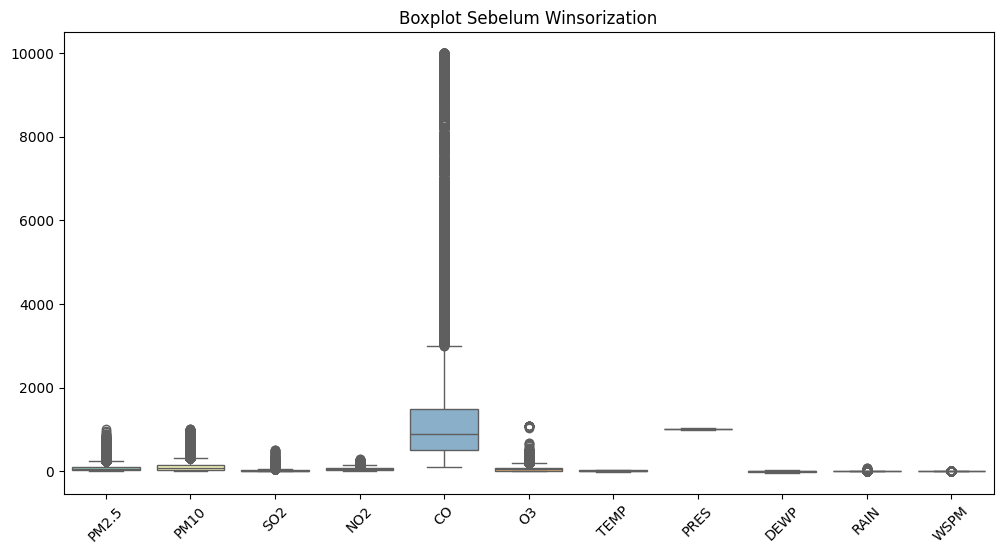

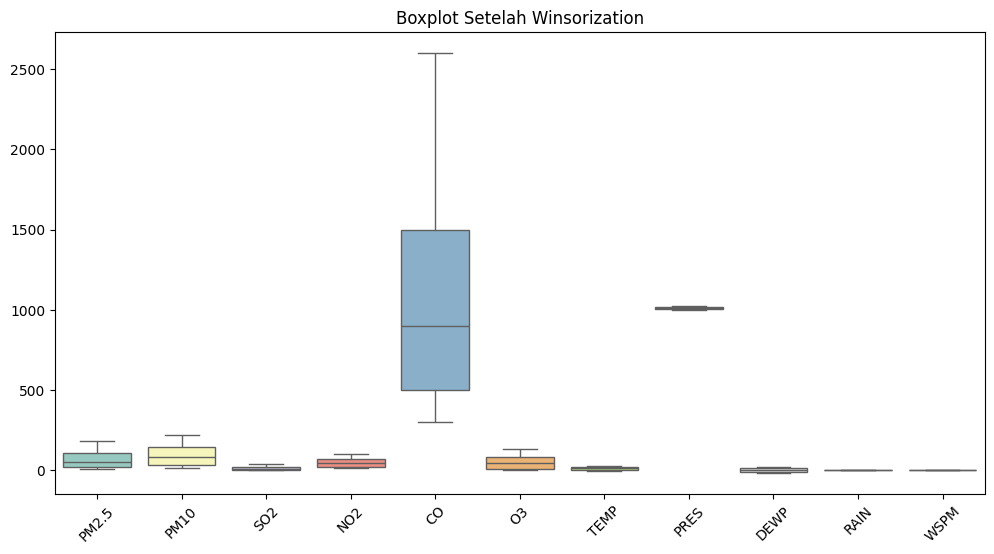

In [11]:
# Boxplot sebelum winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns], palette='Set3')
plt.title('Boxplot Sebelum Winsorization')
plt.xticks(rotation=45)
plt.show()

# Winsorize data
data_winsorized = data.copy()
for col in numerical_columns:
    data_winsorized[col] = winsorize(data[col], limits=[0.1, 0.1])

# Plot boxplot setelah winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_winsorized[numerical_columns], palette='Set3')
plt.title('Boxplot Setelah Winsorization')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Outlier diatasi menggunakan winsorization untuk mempertahankan data tanpa menghilangkan informasi penting.

In [20]:
# Menyimpan hasil setelah cleaning
data.to_csv('dashboard/PRSA_Data_Cleaned.csv', index=False)

print("Data cleaning selesai. File disimpan sebagai 'PRSA_Data_Cleaned.csv'")

Data cleaning selesai. File disimpan sebagai 'PRSA_Data_Cleaned.csv'


## Exploratory Data Analysis (EDA)

### Analisis Statistik Deskriptif

In [12]:
# Statistik deskriptif untuk kolom numerik
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
print(data[numerical_columns].describe())

               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       71.946302      96.652693      13.215398      48.521790   
std        58.241293      67.833455      13.322180      28.800936   
min         9.000000      16.000000       2.000000      12.000000   
25%        20.000000      36.000000       3.000000      23.000000   
50%        55.000000      82.000000       7.000000      43.000000   
75%       111.000000     145.000000      20.000000      71.000000   
max       185.000000     222.000000      42.000000      99.000000   

                  CO             O3           TEMP           PRES  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1105.001398      51.890027      13.533195    1010.710784   
std       737.361605      43.538634      10.553508       9.359582   
min       300.000000       2.000000      -2.000000     997.200000   
25%       500.000000      10.0000

**Insight:** 
- **PM2.5**: Rata-rata 75.88 µg/m³, dengan nilai maksimum 242.0 µg/m³.  
- **PM10**: Rata-rata 100.40 µg/m³, dengan nilai maksimum 280.0 µg/m³.  
- **SO2**: Rata-rata 14.57 µg/m³, dengan nilai maksimum 61.0 µg/m³.  
- **NO2**: Rata-rata 49.55 µg/m³, dengan nilai maksimum 117.0 µg/m³.  
- **CO**: Rata-rata 1162.98 µg/m³, dengan nilai maksimum 3500.0 µg/m³.  
- **O3**: Rata-rata 55.07 µg/m³, dengan nilai maksimum 178.0 µg/m³.  
- **TEMP**: Suhu rata-rata 13.55°C, dengan suhu minimum -4.2°C dan maksimum 30.6°C.  
- **PRES**: Tekanan udara rata-rata 1010.74 hPa, dengan maksimum 1027.9 hPa.  
- **DEWP**: Titik embun rata-rata 2.56°C, dengan rentang -19.9°C hingga 22.1°C.  
- **RAIN**: Hampir semua nilai curah hujan adalah 0 mm, tanpa variasi signifikan.  
- **WSPM**: Kecepatan angin rata-rata 1.69 m/s, dengan maksimum 4.3 m/s.  

### Distribusi Data Numerik

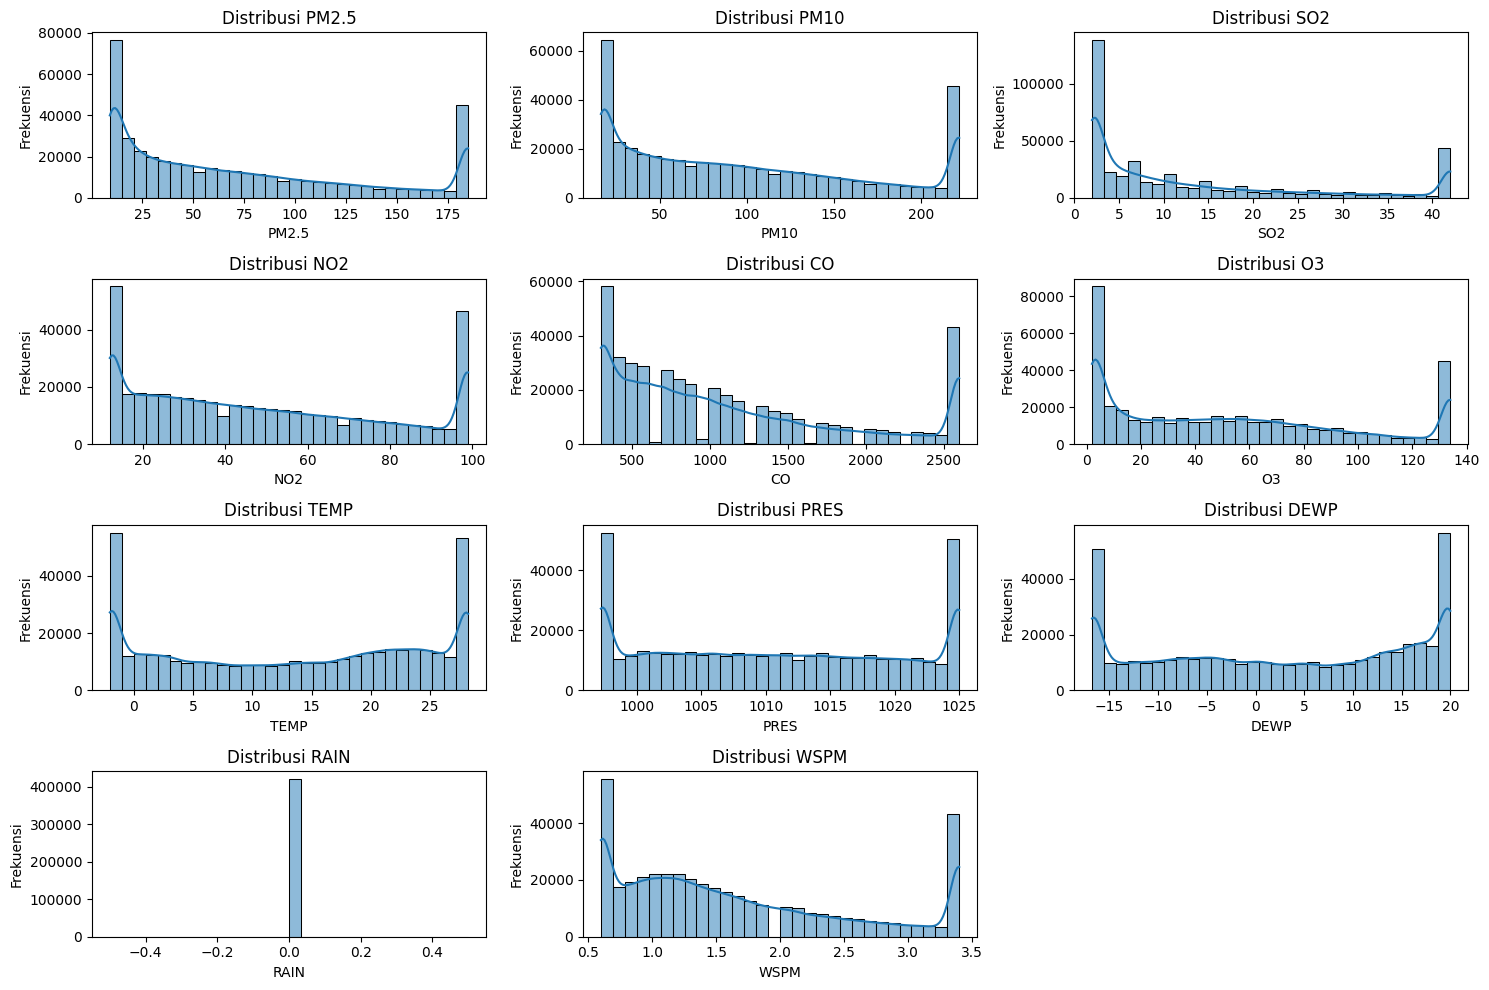

In [13]:
# Plot distribusi kolom numerik
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

**Insight:**
- PM2.5, PM10, SO2, NO2, CO, O3 → Distribusi right-skewed dengan frekuensi tinggi pada nilai rendah dan beberapa outlier di nilai tinggi.
- TEMP, PRES, DEWP → Cenderung normal dengan pola distribusi yang lebih seimbang, menunjukkan variasi yang stabil.
- RAIN → Mayoritas bernilai nol, menandakan curah hujan yang jarang terjadi, dengan sedikit kejadian hujan intensitas tinggi.
- WSPM → Distribusi right-skewed, menunjukkan kecepatan angin rendah lebih umum dibandingkan kecepatan tinggi.

### Korelasi Antar Variabel

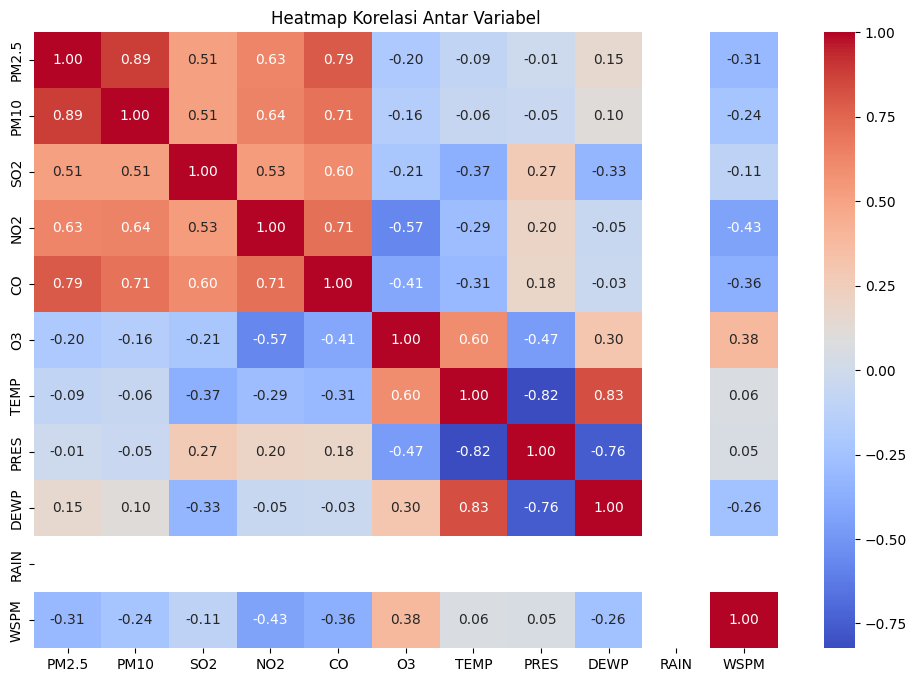

In [14]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

**Insight:**
- **Korelasi positif kuat:**  
  - **PM2.5 dan PM10 (0.89):** Kedua polutan ini sering muncul bersamaan.  
  - **NO2 dan CO (0.71):** Keduanya berasal dari pembakaran bahan bakar fosil.  
  - **TEMP dan DEWP (0.83):** Suhu dan titik embun memiliki hubungan erat.  

- **Korelasi negatif:**  
  - **O3 dan NO2 (-0.57):** Ozon cenderung meningkat saat NO2 berkurang.  
  - **TEMP dan PRES (-0.82):** Tekanan udara cenderung lebih rendah saat suhu meningkat.  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Konsentrasi PM2.5 dan PM10 di Stasiun Aotizhongxin dari Tahun 2013 hingga 2017?

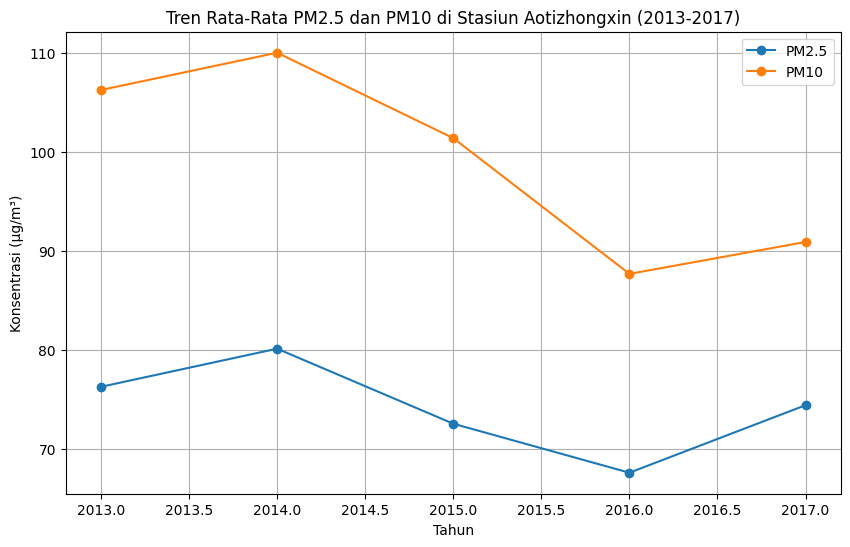

In [15]:
# Filter data untuk stasiun Aotizhongxin
aotizhongxin_data = data[data['station'] == 'Aotizhongxin']

# Group by tahun dan hitung rata-rata PM2.5 dan PM10
yearly_avg = aotizhongxin_data.groupby('year')[['PM2.5', 'PM10']].mean()

# Plot tren
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg['PM2.5'], label='PM2.5', marker='o')
plt.plot(yearly_avg.index, yearly_avg['PM10'], label='PM10', marker='o')
plt.title('Tren Rata-Rata PM2.5 dan PM10 di Stasiun Aotizhongxin (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- PM2.5 dan PM10 mengalami tren penurunan dari 2014 hingga 2016, dengan penurunan signifikan pada 2015-2016.
- Tahun 2017 terjadi peningkatan kembali, terutama untuk PM2.5.
- Fluktuasi ini mungkin dipengaruhi oleh perubahan kebijakan lingkungan atau faktor cuaca.

### Pertanyaan 2: Apakah Ada Korelasi antara Suhu (TEMP) dan Konsentrasi O3 (Ozon)?

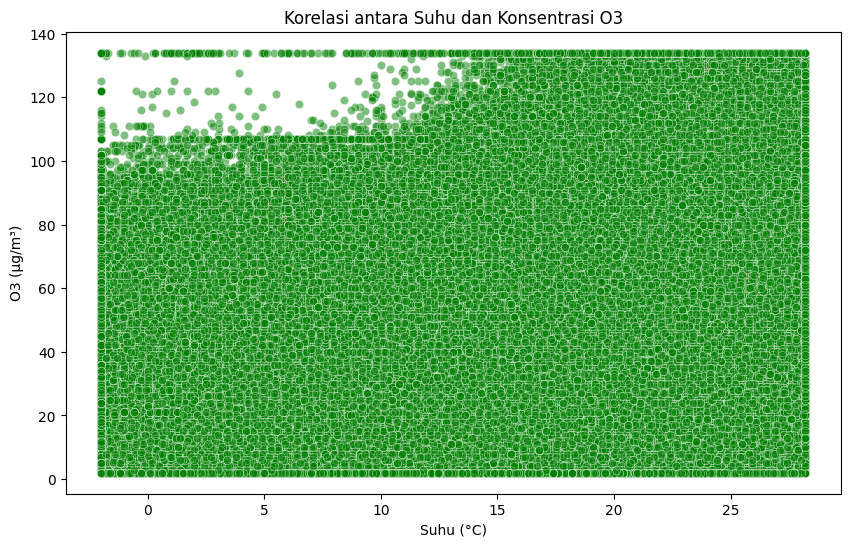

Korelasi Pearson: 0.60


In [16]:
# Scatter plot suhu vs O3
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['TEMP'], y=data['O3'], alpha=0.5, color='green')
plt.title('Korelasi antara Suhu dan Konsentrasi O3')
plt.xlabel('Suhu (°C)')
plt.ylabel('O3 (µg/m³)')
plt.show()

# Hitung korelasi Pearson
corr, _ = pearsonr(data['TEMP'], data['O3'])
print(f'Korelasi Pearson: {corr:.2f}')

**Insight:**
- Korelasi positif (0.60) menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan konsentrasi O3.
- Hal ini karena reaksi fotokimia pembentukan O3 lebih aktif pada suhu tinggi.

### Pertanyaan 3: Bagaimana Distribusi Konsentrasi SO2 dan NO2 di Setiap Stasiun pada Tahun 2016?

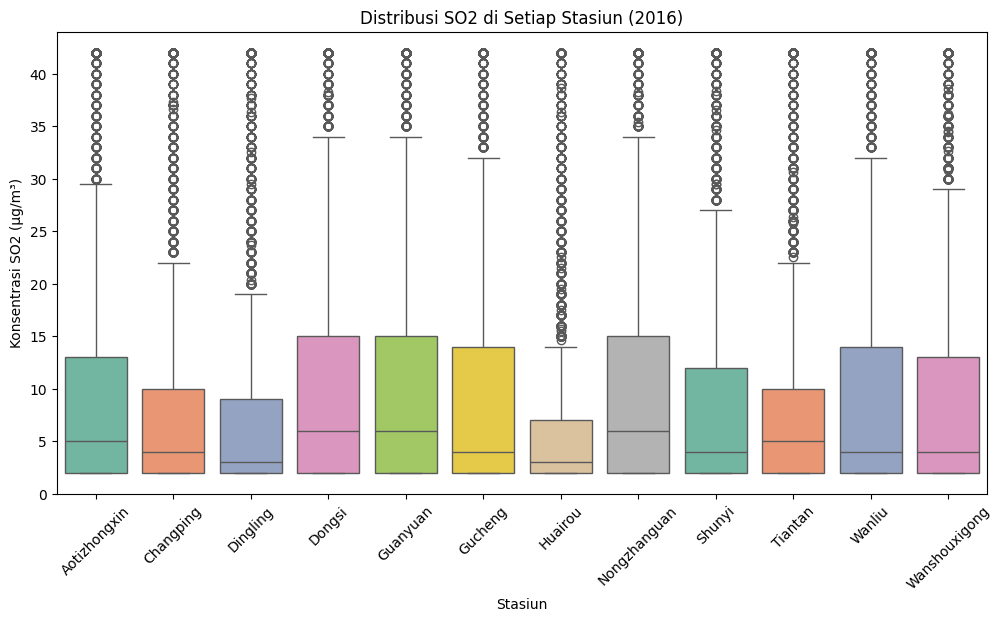

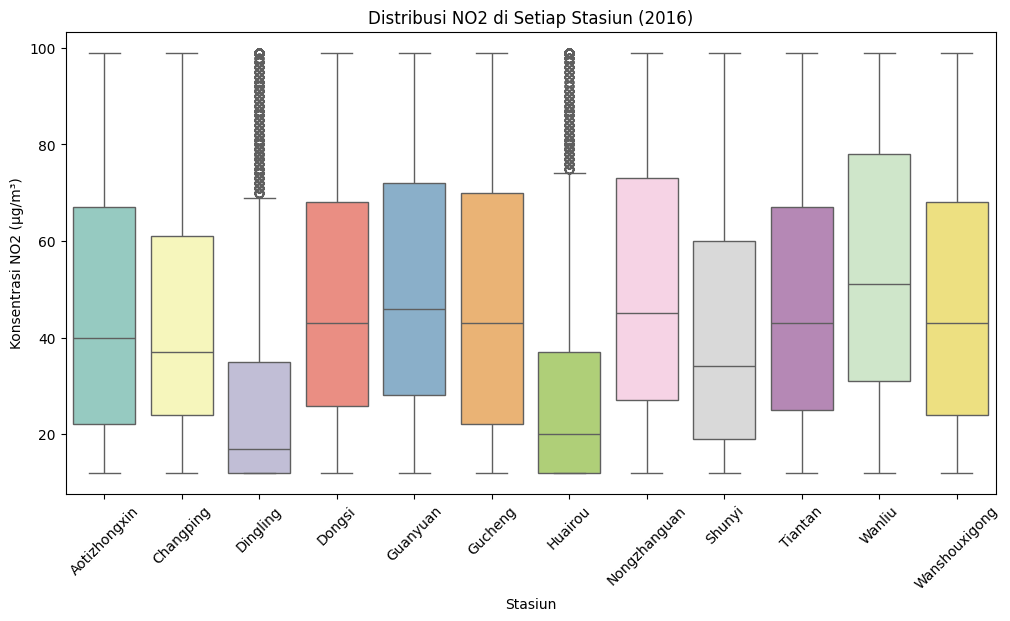

In [17]:
# Filter data untuk tahun 2016
data_2016 = data[data['year'] == 2016]

# Boxplot SO2
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='SO2', data=data_2016, hue='station', palette='Set2', legend=False)
plt.title('Distribusi SO2 di Setiap Stasiun (2016)')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi SO2 (µg/m³)')
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Boxplot NO2
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='NO2', data=data_2016, hue='station', palette='Set3', legend=False)
plt.title('Distribusi NO2 di Setiap Stasiun (2016)')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi NO2 (µg/m³)')
plt.xticks(rotation=45, fontsize=10)
plt.show()

**Insight:**
- Konsentrasi SO2 relatif rendah di semua stasiun, dengan sebagian besar di bawah 20 µg/m³, meski ada beberapa lonjakan.
- Konsentrasi NO2 lebih bervariasi, dengan stasiun seperti Guanyuan, Nongzhanguan dan Wanliu memiliki nilai lebih tinggi, sementara Dingling dan Huairou lebih rendah.
- Variabilitas NO2 lebih besar dibandingkan SO2, menunjukkan pengaruh faktor lingkungan atau sumber emisi yang lebih signifikan.

### Pertanyaan 4: Apakah Ada Perbedaan Pola Suhu (TEMP) antara Stasiun Gucheng dan Huairou?

<Figure size 1200x600 with 0 Axes>

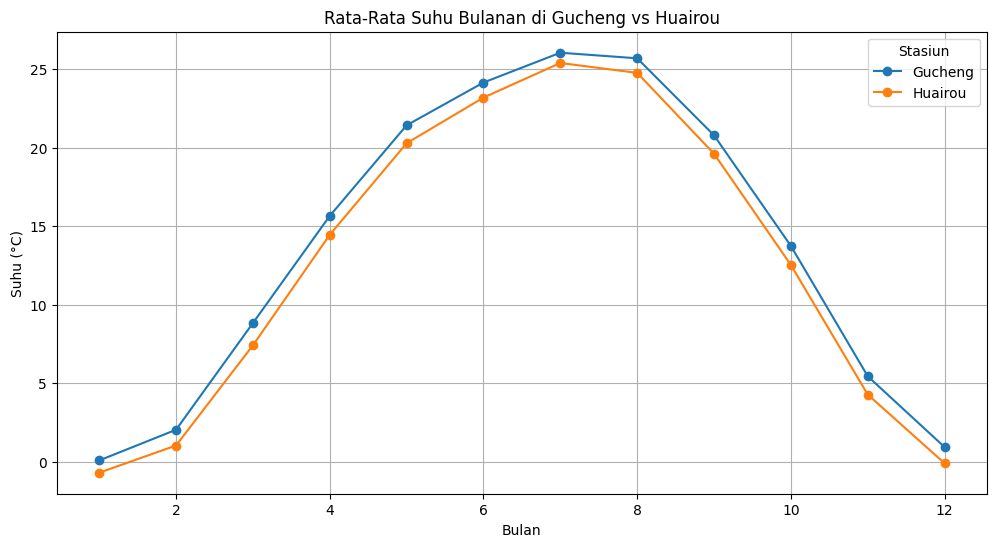

In [18]:
# Filter data untuk kedua stasiun
temp_data = data[data['station'].isin(['Gucheng', 'Huairou'])]

# Group by bulan dan hitung rata-rata suhu
monthly_temp = temp_data.groupby(['station', 'month'])['TEMP'].mean().unstack()

# Plot rata-rata suhu bulanan
plt.figure(figsize=(12, 6))
monthly_temp.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Rata-Rata Suhu Bulanan di Gucheng vs Huairou')
plt.xlabel('Bulan')
plt.ylabel('Suhu (°C)')
plt.legend(title='Stasiun')
plt.grid()
plt.show()

**Insight:**
- Suhu Gucheng lebih hangat dibanding Huairou di hampir semua bulan, kemungkinan karena efek urbanisasi.
- Pola suhu mirip, dengan puncak di Juli-Agustus (~25°C) dan terendah di Desember-Januari (~0°C).
- Huairou lebih dingin karena lebih ke pinggiran dengan lebih banyak area hijau.

## Analisis Lanjutan

### Geospatial Analysis

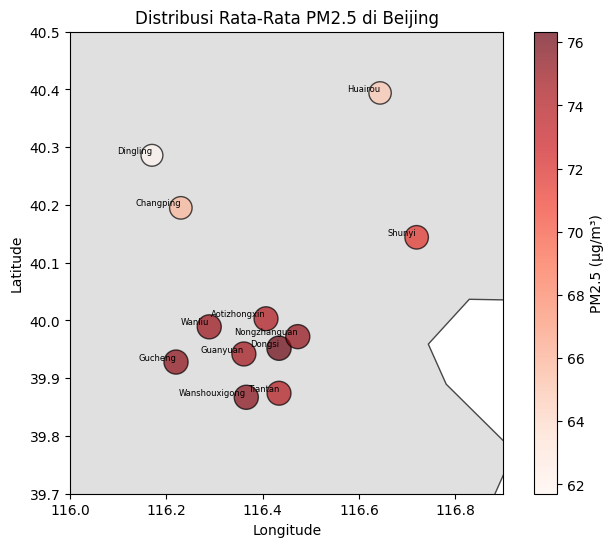

In [19]:
# Hitung rata-rata PM2.5 per stasiun
avg_pm25 = data.groupby('station', as_index=False)['PM2.5'].mean()

# Dictionary koordinat stasiun di Beijing
station_coordinates = {
    "Wanshouxigong": [39.867, 116.366],
    "Dingling": [40.286, 116.170],
    "Dongsi": [39.952, 116.434],
    "Tiantan": [39.874, 116.434],
    "Nongzhanguan": [39.972, 116.473],
    "Guanyuan": [39.942, 116.361],
    "Huairou": [40.394, 116.644],
    "Changping": [40.195, 116.230],
    "Aotizhongxin": [40.003, 116.407],
    "Gucheng": [39.928, 116.220],
    "Wanliu": [39.989, 116.289],
    "Shunyi": [40.144, 116.720]
}

# Tambahkan latitude & longitude berdasarkan koordinat stasiun
avg_pm25['latitude'] = avg_pm25['station'].map(lambda x: station_coordinates.get(x, [None, None])[0])
avg_pm25['longitude'] = avg_pm25['station'].map(lambda x: station_coordinates.get(x, [None, None])[1])

# Hapus baris yang memiliki nilai latitude atau longitude None
avg_pm25 = avg_pm25.dropna(subset=['latitude', 'longitude'])

# Konversi DataFrame menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(avg_pm25, geometry=gpd.points_from_xy(avg_pm25['longitude'], avg_pm25['latitude']))

# Load data peta administrasi China
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces.zip")

# Pilih hanya provinsi Beijing
beijing_column = 'name' if 'name' in world.columns else 'region'
world_beijing = world[world[beijing_column] == "Beijing"]

# Plot peta dengan fokus ke Beijing
fig, ax = plt.subplots(figsize=(8, 6))

# Highlight wilayah Beijing
world_beijing.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

# Plot titik stasiun berdasarkan rata-rata PM2.5
scatter = ax.scatter(
    gdf['longitude'], gdf['latitude'], 
    s=gdf['PM2.5'] * 4,
    c=gdf['PM2.5'], cmap='Reds', alpha=0.7, edgecolors="black"
)

# Tambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax, label='PM2.5 (µg/m³)')

# Tambahkan label nama stasiun
for i, row in gdf.iterrows():
    ax.text(row['longitude'], row['latitude'], row['station'], fontsize=6, ha='right', va='bottom', color='black')

# Fokus hanya pada wilayah yang diinginkan
ax.set_xlim([116, 116.9])
ax.set_ylim([39.7, 40.5])

# Atur aspek agar tidak melebar
ax.set_aspect(1.2)

# Tambahkan judul dan label
plt.title('Distribusi Rata-Rata PM2.5 di Beijing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

**Insight:**
- Stasiun dengan latitude 39.8 - 40.1 dan longitude 116.2 - 116.5 (pusat kota) menunjukkan PM2.5 lebih tinggi, mencerminkan polusi lebih parah akibat aktivitas perkotaan.
- Sebaliknya, daerah pinggiran dengan latitude > 40.2 seperti Huairou dan Dingling memiliki PM2.5 lebih rendah, menandakan udara lebih bersih.
- Shunyi (latitude 40.1, longitude 116.8) memiliki polusi cukup tinggi meskipun di pinggiran, kemungkinan akibat pengaruh industri atau angin dari pusat kota.

---

## Conclusion
1. **Tren PM2.5 dan PM10 di Aotizhongxin (2013-2017)**  
   Konsentrasi PM2.5 dan PM10 mengalami tren penurunan dari 2014 hingga 2016, terutama pada 2015-2016 yang mungkin dipengaruhi oleh kebijakan pengendalian polusi udara. Namun, peningkatan kembali pada 2017 menunjukkan bahwa faktor lain, seperti perubahan pola cuaca atau peningkatan aktivitas industri dan transportasi, dapat memengaruhi kualitas udara secara signifikan.  

2. **Korelasi antara Suhu (TEMP) dan O3**  
   Ditemukan korelasi positif yang cukup kuat antara suhu dan konsentrasi O3, di mana peningkatan suhu cenderung diikuti oleh kenaikan kadar ozon. Hal ini kemungkinan besar disebabkan oleh reaksi fotokimia yang lebih intens pada suhu tinggi. Oleh karena itu, lonjakan suhu selama musim panas dapat memperburuk tingkat ozon dan berdampak pada kualitas udara serta kesehatan masyarakat.  

3. **Distribusi SO2 dan NO2 pada 2016**  
   Konsentrasi SO2 relatif rendah di semua stasiun, menunjukkan bahwa kebijakan pengurangan emisi sulfur berhasil mengendalikan polusi ini. Sebaliknya, konsentrasi NO2 lebih bervariasi, dengan nilai tinggi di daerah perkotaan seperti Guanyuan, Nongzhanguan, dan Wanliu, yang mungkin disebabkan oleh lalu lintas padat dan aktivitas industri. Sementara itu, daerah pinggiran seperti Dingling dan Huairou memiliki tingkat NO2 yang lebih rendah, menandakan bahwa polusi udara lebih terkonsentrasi di daerah padat penduduk.  

4. **Perbedaan Pola Suhu Gucheng vs Huairou**  
   Stasiun Gucheng memiliki suhu yang lebih tinggi dibandingkan Huairou hampir sepanjang tahun, yang kemungkinan disebabkan oleh efek urban heat island (UHI). Pola suhu di kedua lokasi tetap serupa, dengan puncak suhu pada bulan Juli-Agustus (~25°C) dan titik terendah pada Desember-Januari (~0°C). Perbedaan ini mencerminkan dampak urbanisasi terhadap suhu lingkungan, di mana daerah dengan lebih banyak area hijau seperti Huairou cenderung lebih sejuk dibandingkan daerah urban seperti Gucheng.  

5. **Analisis Geospasial PM2.5**  
   Stasiun-stasiun yang berada di pusat kota (latitude 39.8 - 40.1 dan longitude 116.2 - 116.5) menunjukkan tingkat PM2.5 yang lebih tinggi, mencerminkan polusi udara yang lebih parah akibat aktivitas perkotaan seperti transportasi dan industri. Sebaliknya, daerah pinggiran seperti Huairou dan Dingling memiliki tingkat PM2.5 yang lebih rendah, menandakan kualitas udara yang lebih baik. Namun, Shunyi—meskipun berada di pinggiran kota—masih memiliki tingkat polusi yang cukup tinggi, kemungkinan akibat aktivitas industri atau pergerakan massa udara yang membawa polusi dari pusat kota.